Total Sales: $2,297,201
Total Profit: $286,397
Average Profit Margin: 12.47%


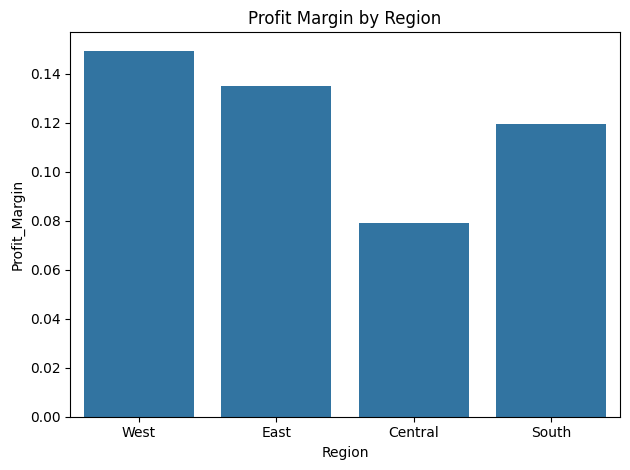

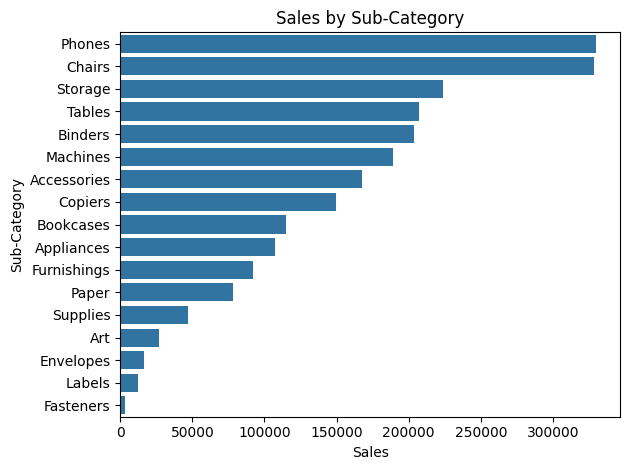

           Category Sub-Category        Sales      Profit  Profit_Margin
3         Furniture       Tables  206965.5320 -17725.4811      -0.085645
0         Furniture    Bookcases  114879.9963  -3472.5560      -0.030228
12  Office Supplies     Supplies   46673.5380  -1189.0995      -0.025477
          Discount    Profit
Discount  1.000000 -0.219487
Profit   -0.219487  1.000000


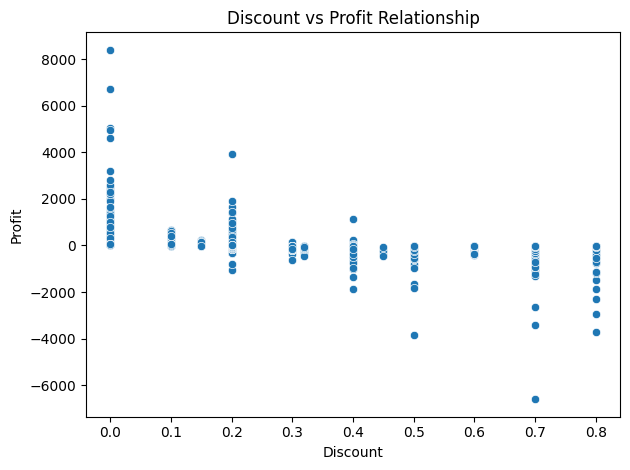

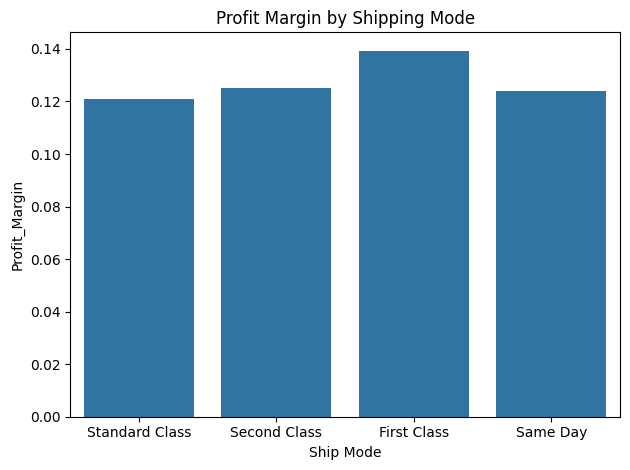

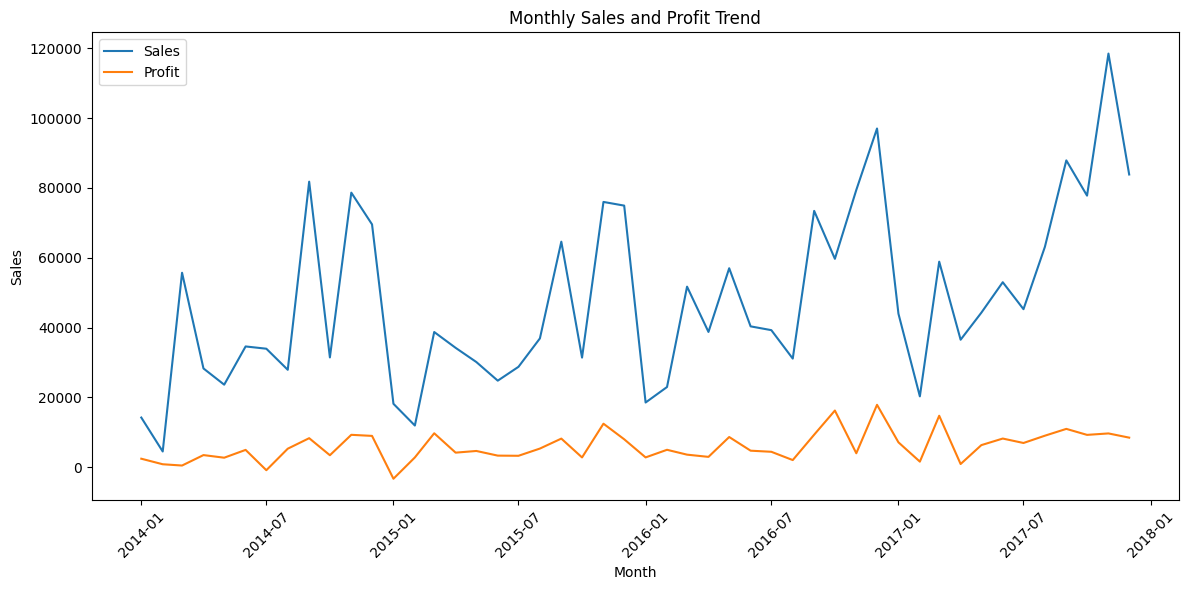

'\n- West region drives the highest revenue; South achieves best profit margin.\n- Technology leads all categories in both profit and sales.\n- Furniture (especially Tables, Bookcases) consistently drags profit down.\n- Higher discounts strongly reduce profitability.\n- Standard shipping offers best cost-efficiency; faster modes cut margins.\n- Clear year-end sales peaks indicate seasonal retail patterns.\n'

In [66]:
# ---------------------------------------
# Superstore Sales & Profit Analysis
# ---------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------
# 1. Load Data
# ---------------------------------------
df = pd.read_csv('./data/Superstore.csv', encoding='latin1')

# Ensure date columns are datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.to_period('M')

# ---------------------------------------
# 2. KPI Summary
# ---------------------------------------
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
profit_margin = (df['Profit'].sum() / df['Sales'].sum()) * 100

print(f"Total Sales: ${total_sales:,.0f}")
print(f"Total Profit: ${total_profit:,.0f}")
print(f"Average Profit Margin: {profit_margin:.2f}%")

# ---------------------------------------
# 3. Helper Function
# ---------------------------------------
def summarize(df, by, metrics=('Sales','Profit')):
    """Group and summarize key metrics with profit margin."""
    return (
        df.groupby(by, as_index=False)[list(metrics)]
          .sum()
          .assign(Profit_Margin=lambda x: x['Profit'] / x['Sales'])
          .sort_values(metrics[0], ascending=False)
    )

# ---------------------------------------
# 4. Regional Performance
# ---------------------------------------
region_summary = summarize(df, 'Region')
sns.barplot(x='Region', y='Profit_Margin', data=region_summary)
plt.title('Profit Margin by Region')
plt.tight_layout()
plt.show()

# Insights:
# - West leads in total sales.
# - South shows stronger efficiency.
# - Central underperforms in profit margin.

# ---------------------------------------
# 5. Category & Sub-Category Performance
# ---------------------------------------
cat_summary = summarize(df, ['Category','Sub-Category'])
sns.barplot(y='Sub-Category', x='Sales', data=cat_summary.sort_values('Sales', ascending=False))
plt.title('Sales by Sub-Category')
plt.tight_layout()
plt.show()

# Insights:
# - Technology dominates in both sales and profit.
# - Office Supplies stable but mid-range.
# - Furniture volume high but margins weak.

# ---------------------------------------
# 6. Loss Drivers
# ---------------------------------------
losses = summarize(df, ['Category','Sub-Category'])
losses = losses.query('Profit < 0').sort_values('Profit')
print(losses.head())

# ---------------------------------------
# 7. Discount Impact
# ---------------------------------------
print(df[['Discount','Profit']].corr())
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs Profit Relationship')
plt.tight_layout()
plt.show()

# ---------------------------------------
# 8. Shipping Mode Performance
# ---------------------------------------
ship_summary = summarize(df, 'Ship Mode', metrics=('Sales','Profit','Quantity'))
sns.barplot(x='Ship Mode', y='Profit_Margin', data=ship_summary)
plt.title('Profit Margin by Shipping Mode')
plt.tight_layout()
plt.show()

# ---------------------------------------
# 9. Time Trends
# ---------------------------------------
monthly = summarize(df, 'Month')
monthly['Month'] = monthly['Month'].dt.to_timestamp()
monthly = monthly.sort_values('Month')

plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Sales', data=monthly, label='Sales')
sns.lineplot(x='Month', y='Profit', data=monthly, label='Profit')
plt.title('Monthly Sales and Profit Trend')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# ---------------------------------------
# 10. Final Insights Summary
# ---------------------------------------
"""
- West region drives the highest revenue; South achieves best profit margin.
- Technology leads all categories in both profit and sales.
- Furniture (especially Tables, Bookcases) consistently drags profit down.
- Higher discounts strongly reduce profitability.
- Standard shipping offers best cost-efficiency; faster modes cut margins.
- Clear year-end sales peaks indicate seasonal retail patterns.
"""
